In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Model,Sequential
from keras.layers import Dense,Input
from keras.optimizers import Adam
from keras.utils import np_utils

In [34]:
data = pd.read_csv('fashion-mnist_test.csv')
x = data.values
X = x[:,1:]
X = X/255.0
y = x[:,0]

y = np_utils.to_categorical(y)   ## making a one hot encoding

print(X.shape,y.shape)

(10000, 784) (10000, 10)


In [35]:
## splitting data

X_train = X[:8000,:]
y_train = y[:8000,:]

X_val = X[8000:,:]
y_val = y[8000:,:]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(8000, 784) (8000, 10)
(2000, 784) (2000, 10)


# Sequential Model

In [40]:
## Sequential is a type of model

model = Sequential()

model.add(Dense(256, activation='relu',input_shape=(784,)))   ## input size needs to be specified only once
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_17 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [41]:
adam = Adam(decay=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = "Adam", metrics = ["accuracy"])

In [42]:
history = model.fit(X_train, y_train, epochs=20, 
                    batch_size=200, shuffle=True, 
                    validation_data=(X_val,y_val))

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 1s 133us/step - loss: 1.0158 - acc: 0.6603 - val_loss: 0.6171 - val_acc: 0.7920
Epoch 2/20
8000/8000 [==============================] - 0s 51us/step - loss: 0.5728 - acc: 0.7995 - val_loss: 0.5065 - val_acc: 0.8185
Epoch 3/20
8000/8000 [==============================] - 0s 46us/step - loss: 0.4837 - acc: 0.8304 - val_loss: 0.4870 - val_acc: 0.8310
Epoch 4/20
8000/8000 [==============================] - 0s 47us/step - loss: 0.4587 - acc: 0.8418 - val_loss: 0.4427 - val_acc: 0.8390
Epoch 5/20
8000/8000 [==============================] - 0s 47us/step - loss: 0.4117 - acc: 0.8546 - val_loss: 0.4144 - val_acc: 0.8540
Epoch 6/20
8000/8000 [==============================] - 0s 47us/step - loss: 0.3933 - acc: 0.8616 - val_loss: 0.4307 - val_acc: 0.8515
Epoch 7/20
8000/8000 [==============================] - 0s 47us/step - loss: 0.3644 - acc: 0.8723 - val_loss: 0.4143 - val_acc: 0.8560
Epoch 

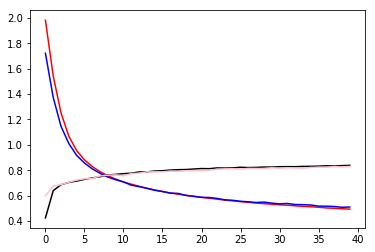

In [7]:
# SGD

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()

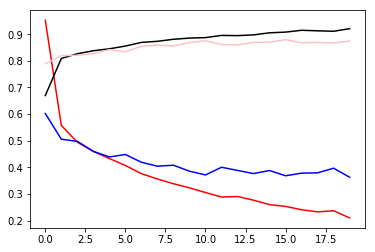

In [33]:
# Adam without decay

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()

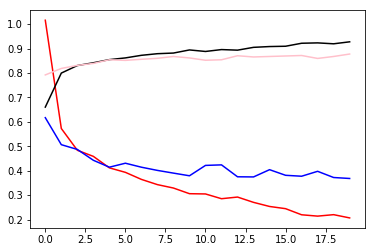

In [43]:
# Adam with decay

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()

# Functional Model

In [44]:
inp = Input(shape=(784,))
d1 = Dense(256, activation='relu')(inp)
d2 = Dense(64, activation='relu')(d1)
d3 = Dense(10, activation='softmax')(d2)

model = Model(inputs=[inp], outputs=[d3])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_20 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [45]:
adam = Adam(decay=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=10, 
                    batch_size=200, shuffle=True, 
                    validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 141us/step - loss: 0.9457 - acc: 0.6840 - val_loss: 0.6172 - val_acc: 0.7765
Epoch 2/10
8000/8000 [==============================] - 0s 46us/step - loss: 0.5708 - acc: 0.8037 - val_loss: 0.5011 - val_acc: 0.8210
Epoch 3/10
8000/8000 [==============================] - 0s 47us/step - loss: 0.4954 - acc: 0.8261 - val_loss: 0.4819 - val_acc: 0.8290
Epoch 4/10
8000/8000 [==============================] - 0s 46us/step - loss: 0.4441 - acc: 0.8490 - val_loss: 0.4747 - val_acc: 0.8375
Epoch 5/10
8000/8000 [==============================] - 0s 47us/step - loss: 0.4163 - acc: 0.8576 - val_loss: 0.4322 - val_acc: 0.8495
Epoch 6/10
8000/8000 [==============================] - 0s 46us/step - loss: 0.3840 - acc: 0.8659 - val_loss: 0.4260 - val_acc: 0.8530
Epoch 7/10
8000/8000 [==============================] - 0s 47us/step - loss: 0.3887 - acc: 0.8598 - val_loss: 0.4163 - val_acc: 0.8575
Epoch 

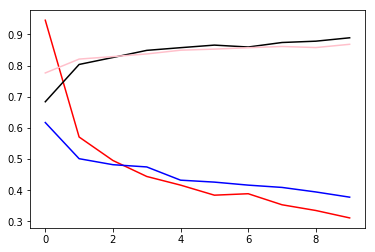

In [46]:
# Adam with decay

plt.plot(history.history['loss'], color='red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['acc'], color='black')
plt.plot(history.history['val_acc'], color='pink')
plt.show()